## TimeSeries Forcasting Week 3 Exercise

In [2]:
## import all the modules need to be used
import statsmodels 
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
et = pd.read_csv('../data/module3_data_Identifying_ARMA.csv')
et.head()

,et
0,-1.213866
1,-0.285460
2,0.590270
3,0.828546
4,-0.995426


### 1. Explort Some time series properties 

In [4]:
## Q1 
## get the mean and standard deviation
print(et.mean())
print(et.std())

et   -0.02846
dtype: float64
et    0.982
dtype: float64


In [5]:
## Q2 
## generate a series absed on white noise disturbance yt = 3 + 0.55yt-1 + errort
df = pd.DataFrame([np.zeros(len(et))]*3,index=['AR_1','MA_1','AR1MA1']).T
for i in range(1,len(et)):
    df.AR_1[i] = 3+0.55*df.AR_1[i-1] + et["et"][i]
    df.MA_1[i] = -2.5 + et["et"][i] + 0.7*et["et"][i-1]
    df.AR1MA1[i] = 0.5 +0.55*df.AR1MA1[i-1]+ et["et"][i] + 0.7*et["et"][i-1]

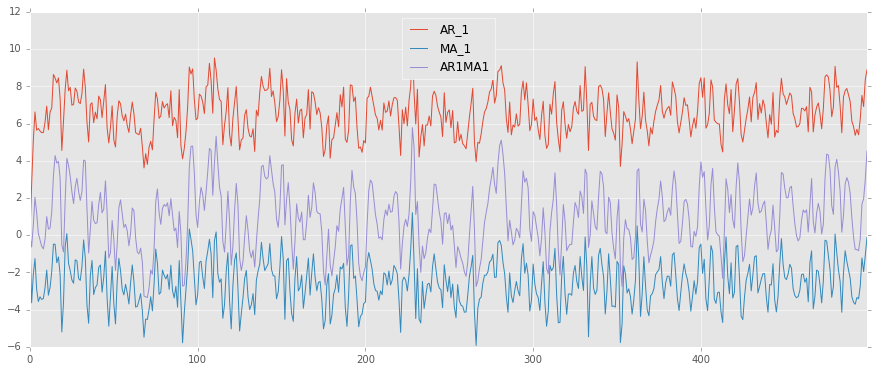

In [6]:
df.plot()

         acf                             confint    qstat      pvalues
0          1                          [1.0, 1.0]  136.647  1.44068e-31
1    0.52121    [0.521210263805, 0.521210263805]  158.112  4.63881e-35
2    0.20637    [0.206370154351, 0.206370154351]  163.315  3.52968e-35
3   0.101498    [0.101497891425, 0.101497891425]  167.304  3.96348e-35
4  0.0887846  [0.0887846304206, 0.0887846304206]  170.778  4.97973e-35


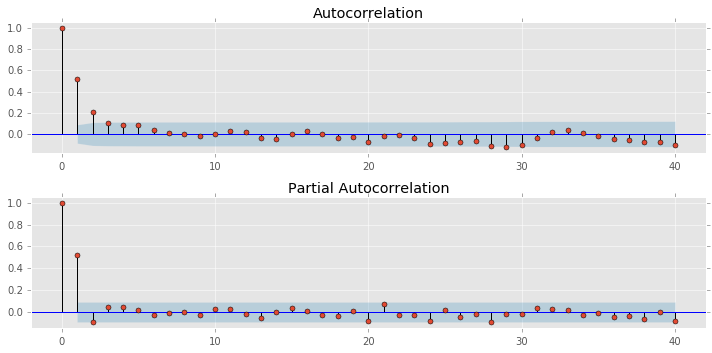

In [7]:
## Q3 check ACF and PCF

# get the data for acf 
acf = tsa.acf(df['AR_1'], qstat=True, fft=True, alpha=True)
acf_pd = pd.DataFrame(list(acf)).T
acf_pd.columns = ['acf','confint','qstat','pvalues']
print (acf_pd.head())
# we can do the same thing for pcf, i just skipped it here 

## now let's look at the charts 
fig = plt.figure(figsize=(10,5))
layout = (2, 1)
acf_ax   = plt.subplot2grid(layout, (0, 0))
pcf_ax = plt.subplot2grid(layout, (1, 0))
fig_acf = sm.graphics.tsa.plot_acf(df.AR_1,lags = 40,ax=acf_ax)
fig_pcf = sm.graphics.tsa.plot_pacf(df.AR_1,lags = 40,ax=pcf_ax)
plt.tight_layout()

In general, for AR model, we will see gradual decay of ACF and abrupt dropoff in PACF. For MA models, we will see abrupt dropoff in ACF and gradual decay of PACF, it can be oscillating.

## 2. Identify which model we should use, assuming statinary time series

From looking at the ACF PACF charts, we can see that it is likely AR1. Try run AR1 model 

In [8]:
### first, add time stamp to the dataframe
time = pd.date_range('1/9/1975',periods=500,freq='M')
df['time'] = time 
df.index = df.time
df.dtypes

### a couple of differnt ways to create time index 
# df['time'] = pd.to_datetime(df.dateid01)                           ## if there is a variable indicating time, we can convert it 
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')     ## if time is in string, we can also convert it 
# data["t_month"] = data["Month"].apply(dateparse)
# start = datetime(2011, 1, 1)                                       ## or we can use start and end data to create a date range
# end = datetime(2012, 1, 1)
# rng = pd.date_range(start, end)


AR_1             float64
MA_1             float64
AR1MA1           float64
time      datetime64[ns]
dtype: object

In [9]:
## take a look at the model results with AR1 
ar1_model = tsa.ARMA(df.AR_1,(1,0))
ar1_result = ar1_model.fit() 
print(ar1_result.summary())

                              ARMA Model Results                              
Dep. Variable:                   AR_1   No. Observations:                  500
Model:                     ARMA(1, 0)   Log Likelihood                -714.602
Method:                       css-mle   S.D. of innovations              1.010
Date:                Sat, 15 Oct 2016   AIC                           1435.203
Time:                        00:18:05   BIC                           1447.847
Sample:                    01-31-1975   HQIC                          1440.165
                         - 08-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5631      0.102     64.421      0.000       6.363       6.763
ar.L1.AR_1     0.5577      0.039     14.335      0.000       0.481       0.634
                                    Roots           

         acf                               confint     qstat    pvalues
0          1                            [1.0, 1.0]  0.157093   0.691847
1  0.0176723    [0.0176722596522, 0.0176722596522]   5.36207  0.0684924
2  -0.101622      [-0.10162184056, -0.10162184056]    6.3325  0.0965076
3 -0.0438353  [-0.0438353398905, -0.0438353398905]   6.56651   0.160647
4  0.0215042    [0.0215041978199, 0.0215041978199]   7.83792   0.165397


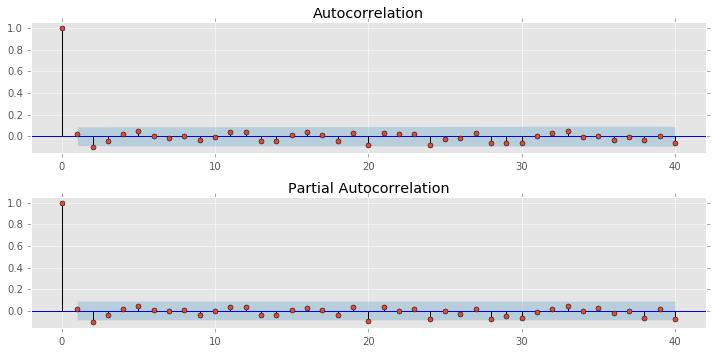

In [10]:
## now let's take a look at error, see if they are corrolated
resid = ar1_result.resid
acf = tsa.acf(resid, qstat=True, fft=True, alpha=True)
acf_pd = pd.DataFrame(list(acf)).T
acf_pd.columns = ['acf','confint','qstat','pvalues']
print(acf_pd.head())

## now let's look at the charts 
fig = plt.figure(figsize=(10,5))
layout = (2, 1)
acf_ax   = plt.subplot2grid(layout, (0, 0))
pcf_ax = plt.subplot2grid(layout, (1, 0))
fig_acf = sm.graphics.tsa.plot_acf(resid,lags = 40,ax=acf_ax)
fig_pcf = sm.graphics.tsa.plot_pacf(resid,lags = 40,ax=pcf_ax)
plt.tight_layout()

We checked the auto corrolation with residuals, it seems to be fairly random. So our AR1 model might be ok. AR2 might be ok as well, it is a judgemental call. We can compare AIC and BIC to help us to make a decision 

## There is a way to automatically select the best arma model in eviews, we need to write it by ourselvef in python. The idea is try all the combinations and compare AIC or BIC

#### Update:  gride search for maxium lags for ARIMA model. this can be modifed for other models as well 
Borrowed from https://github.com/silicon-valley-data-science/pydata-sf-2016-arima-tutorial.git

Warning: this is very slow. don't set p d q to be too high 

In [11]:
import itertools
import warnings

def model_gridsearch(ts,p,d,q):
    cols = ['p', 'd', 'q','aic', 'bic']

    # Initialize a DataFrame to store the results
    df_results = pd.DataFrame(columns=cols)

    mod_num=0
    for p,d,q in itertools.product(range(0,p+1),range(0,d+1),range(0,q+1)):
        # initialize to store results for this parameter set
        this_model = pd.DataFrame(index=[mod_num], columns=cols)

        if p==0 and d==0 and q==0:
            continue
        
        try:
            model = sm.tsa.ARIMA(ts,order=(p, d, q))
            ## surprise warnings 
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                model_results = model.fit(disp=0)
                
            this_model.loc[mod_num, 'p'] = p
            this_model.loc[mod_num, 'd'] = d
            this_model.loc[mod_num, 'q'] = q
            this_model.loc[mod_num, 'aic'] = model_results.aic
            this_model.loc[mod_num, 'bic'] = model_results.bic
            df_results = df_results.append(this_model)
            mod_num+=1
        except:
            continue

    return df_results

In [12]:
## run the grid search for max p = 9, max q = 5
res = model_gridsearch(df.AR1MA1,9,0,5)

In [13]:
## sorted by bic criteria 
res.sort_values(by='bic').head(5)

,p,d,q,aic,bic
2,1,0,1,1405.61,1422.47
3,1,0,2,1405.87,1426.94
8,2,0,1,1406.11,1427.18
14,3,0,1,1407.41,1432.7
4,1,0,3,1407.62,1432.91


#### we can see that the auto search lag function did find the optimal lag orders 